# **_002 - Exploratory Data Analysis of Grammy Data_**

## **_Data Loading_**

In [1]:
import os
import json
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
try:
    os.chdir("../../Workshop_002")
except FileNotFoundError:
    print("""
        FileNotFoundError - Puede que el directorio no exista o no estas ubicad@ en la ruta especificada.
        """)
os.chdir("..")
print(os.getcwd())

c:\Users\natym\Desktop


In [3]:
with open("Workshop_002/credentials.json", "r", encoding = "utf-8") as f:
    credentials = json.load(f)

db_host = credentials["db_host"]
db_name = credentials["db_name"]
db_user = credentials["db_user"]
db_password = credentials["db_password"]

db_engine = create_engine(f"postgresql://{db_user}:{db_password}@{db_host}:5432/{db_name}")

In [4]:
query = "SELECT * FROM grammys_raw_data;"
grammy_df = pd.read_sql(query, db_engine)
grammy_df.head()

,year,title,published_at,updated_at,category,nominee,artist,workers,img,winner
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",https://www.grammy.com/sites/com/files/styles/...,True
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",https://www.grammy.com/sites/com/files/styles/...,True
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",https://www.grammy.com/sites/com/files/styles/...,True
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",https://www.grammy.com/sites/com/files/styles/...,True
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19T05:10:28-07:00,2020-05-19T05:10:28-07:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",https://www.grammy.com/sites/com/files/styles/...,True


## **_Dataset information_**

In [5]:
grammy_df.shape

(4810, 10)

In [6]:
grammy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4810 entries, 0 to 4809
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          4810 non-null   int64 
 1   title         4810 non-null   object
 2   published_at  4810 non-null   object
 3   updated_at    4810 non-null   object
 4   category      4810 non-null   object
 5   nominee       4804 non-null   object
 6   artist        2970 non-null   object
 7   workers       2620 non-null   object
 8   img           3443 non-null   object
 9   winner        4810 non-null   bool  
dtypes: bool(1), int64(1), object(8)
memory usage: 343.0+ KB


In [7]:
grammy_df.nunique()

year              62
title             62
published_at       4
updated_at        10
category         638
nominee         4131
artist          1658
workers         2366
img             1463
winner             1
dtype: int64

In [8]:
grammy_df.describe(include='object')

,title,published_at,updated_at,category,nominee,artist,workers,img
count,4810,4810,4810,4810,4804,2970,2620,3443
unique,62,4,10,638,4131,1658,2366,1463
top,62nd Annual GRAMMY Awards (2019),2017-11-28T00:03:45-08:00,2019-09-10T01:08:19-07:00,Song Of The Year,Bridge Over Troubled Water,(Various Artists),"John Williams, composer (John Williams)",https://www.grammy.com/sites/com/files/styles/...
freq,433,4205,778,70,7,66,20,26


## **_Data cleaning_**

#### **_Columns removal_**

In this case the columns "published_at", "updated_at" and "img" aren't useful for the analysis, for this reason they will be eliminated. 

In [9]:
grammy_df = grammy_df.drop(['published_at', 'updated_at', 'img'], axis=1)
grammy_df.head()

,year,title,category,nominee,artist,workers,winner
0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",True
1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",True
2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",True
3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",True
4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",True


#### **_Nulls Management_**

In [10]:
grammy_df.isna().sum()

year           0
title          0
category       0
nominee        6
artist      1840
workers     2190
winner         0
dtype: int64

_**Nulls in "nominee"**_

We eliminate rows where there is no value in the `nominee` column, as these records do not provide relevant information to the analysis.

In [11]:
grammy_df = grammy_df.dropna(subset=['nominee'])

_**Nulls in "artist"**_

We identify which categories have both fields (`artist and workers`) empty to evaluate what to do with them. And as we can see the nominee is the missing value in artist in the majority of the cases. 

In [12]:
grammy_df[(grammy_df['artist'].isnull()) & (grammy_df['workers'].isnull())]

,year,title,category,nominee,artist,workers,winner
24,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Billie Eilish,None,None,True
25,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Black Pumas,None,None,True
26,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Lil Nas X,None,None,True
27,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Lizzo,None,None,True
28,2019,62nd Annual GRAMMY Awards (2019),Best New Artist,Maggie Rogers,None,None,True
...,...,...,...,...,...,...,...
4699,1961,4th Annual GRAMMY Awards (1961),Best New Artist Of 1961,Peter Nero,None,None,True
4745,1960,3rd Annual GRAMMY Awards (1960),Best New Artist Of 1960,Bob Newhart,None,None,True
4762,1959,2nd Annual GRAMMY Awards (1959),Best Classical Performance - Vocal Soloist (Wi...,Bjoerling In Opera,None,None,True
4781,1959,2nd Annual GRAMMY Awards (1959),Best New Artist Of 1959,Bobby Darin,None,None,True


In [13]:
null_categories = grammy_df[(grammy_df['artist'].isnull()) & (grammy_df['workers'].isnull())]['category'].unique()
print(null_categories)

['Best New Artist' 'Producer Of The Year, Non-Classical'
 'Producer Of The Year, Classical'
 'Best Small Ensemble Performance (With Or Without Conductor)'
 'Best Classical Vocal Performance' 'Producer Of The Year'
 'Classical Producer Of The Year' 'Best Producer Of The Year'
 'Producer Of The Year (Non-Classical)'
 'Producer Of The Year (Non Classical)' 'Best Classical Vocal Soloist'
 'Producer Of The Year, (Non Classical)'
 'Best Classical Vocal Soloist Performance'
 'Best Classical Performance - Instrumental Soloist Or Soloists (With Or Without Orchestra)'
 'Best New Classical Artist' 'Best New Artist Of The Year'
 'Best Classical Performance - Vocal Soloist'
 'Best Performance - Instrumental Soloist Or Soloists (With Or Without Orchestra)'
 'Most Promising New Classical Recording Artist' 'Best New Artist Of 1964'
 'Best New Artist Of 1963' 'Best New Artist Of 1962'
 'Best New Artist Of 1961' 'Best New Artist Of 1960'
 'Best Classical Performance - Vocal Soloist (With Or Without Orch

We filter out the categories that do not add value to the analysis, since they have empty `artist` and `workers`, and the values in nominee has nothing to do with artists. 

In [14]:
categories_non_useful = [
    'Best Small Ensemble Performance (With or Without Conductor)',
    'Best Classical Vocal Performance',
    'Best Classical Vocal Soloist Performance',
    'Best Classical Performance - Instrumental Soloist or Soloists (With or Without Orchestra)',
    'Best Classical Performance - Vocal Soloist',
    'Best Performance - Instrumental Soloist or Soloists (With or Without Orchestra)',
    'Best Classical Performance - Vocal Soloist (With or Without Orchestra)'
]

filter = (
    (grammy_df['artist'].isnull()) &
    (grammy_df['workers'].isnull()) &
    (grammy_df['category'].isin(categories_non_useful))
)

grammy_df[filter]

,year,title,category,nominee,artist,workers,winner
2571,1997,40th Annual GRAMMY Awards (1997),Best Classical Vocal Performance,"An Italian Songbook - Works Of Bellini, Donize...",None,None,True
2834,1994,37th Annual GRAMMY Awards (1994),Best Classical Vocal Performance,The Impatient Lover - Italian Songs By Beethov...,None,None,True
2915,1993,36th Annual GRAMMY Awards (1993),Best Classical Vocal Performance,"The Art Of Arleen Auger (Works Of Larsen, Purc...",None,None,True
2999,1992,35th Annual GRAMMY Awards (1992),Best Classical Vocal Performance,"Kathleen Battle At Carnegie Hall (Handel, Moza...",None,None,True
3374,1987,30th Annual GRAMMY Awards (1987),Best Classical Vocal Soloist Performance,Kathleen Battle - Salzburg Recital,None,None,True
3767,1972,15th Annual GRAMMY Awards (1972),Best Classical Vocal Soloist Performance,Brahms: Die Schone Magelone,None,None,True
3942,1978,21st Annual GRAMMY Awards (1978),Best Classical Vocal Soloist Performance,Luciano Pavarotti - Hits From Lincoln Center,None,None,True
4039,1976,19th Annual GRAMMY Awards (1976),Best Classical Vocal Soloist Performance,Herbert: Music Of Victor Herbert,None,None,True
4135,1974,17th Annual GRAMMY Awards (1974),Best Classical Vocal Soloist Performance,Leontyne Price Sings Richard Strauss,None,None,True
4178,1960,3rd Annual GRAMMY Awards (1960),Best Classical Performance - Vocal Soloist,A Program Of Song - Leontyne Price Recital,None,None,True


In [15]:
cantidad = grammy_df[filter].shape[0]
print(f"Número de filas a eliminar: {cantidad}")

Número de filas a eliminar: 12


We eliminate the rows of the previously identified non-useful categories.

In [16]:
grammy_df = grammy_df[~filter]

 We fill in the missing values in `artist` with the available data from the `nominee` column.

In [17]:
condition = grammy_df['artist'].isnull() & grammy_df['workers'].isnull()
grammy_df.loc[condition, 'artist'] = grammy_df.loc[condition, 'nominee']

In [18]:
grammy_df[(grammy_df['artist'].isnull()) & (grammy_df['workers'].isnull())]

,year,title,category,nominee,artist,workers,winner


Now, in the dataset you can see that the names of the artists are at the end in parenthesis in the data of the workers column. For that case, we apply a function that extracts the artist name from the `workers` column when `artist` is empty, using regular expressions.

In [19]:

def extract_artist(workers):
    match = re.search(r'\((.*?)\)', workers)
    if match:
        return match.group(1)
    return None

grammy_df["artist"] = (grammy_df.apply(lambda row:extract_artist(row["workers"])
        if pd.isna(row["artist"])
            else row["artist"], axis=1))

Finally, to finish filling the artist nulls, we define a function that maps the rows of the `workers` column and extracts the names in which the role is one related to artist (soloist, composer, conductor, artist).

In [20]:
def extract_artist(workers):
    if pd.isnull(workers):
        return None
    
    rule = re.match(r"([^,;]+), (soloist|composer|conductor|artist)", workers)
    if rule:
        return rule.group(1).strip()
    
    rule = re.match(r"(.+?(Featuring|&| and ).*?)(;|,|$)", workers, re.IGNORECASE)
    if rule:
        return rule.group(1).strip()
    
    return workers.strip()

grammy_df['artist'] = grammy_df['artist'].fillna(grammy_df['workers'].apply(extract_artist))

We verify that the main columns no longer contain null values after cleaning.

In [21]:
grammy_df.isna().sum()

year           0
title          0
category       0
nominee        0
artist         0
workers     2172
winner         0
dtype: int64

We check the number of occurrences for each unique value in the artist column for inconsistencies or necessary groupings.

In [22]:
grammy_df['artist'].value_counts()

artist
(Various Artists)                                                    66
Various Artists                                                      43
Chicago Symphony Orchestra                                           29
John Williams                                                        24
Henry Mancini                                                        22
                                                                     ..
Israel And New Breed                                                  1
Aretha Franklin & Mary J. Blige (Featuring The Harlem Boys Choir)     1
Paquito D'Rivera Quintet?                                             1
Patti Austin                                                          1
Roger Wagner, choir director                                          1
Name: count, Length: 2486, dtype: int64

We normalize the artist values, replacing '(Various Artists)' with 'Various Artists' to avoid semantic duplicates.

In [23]:
grammy_df['artist'] = grammy_df['artist'].replace({'(Various Artists)': 'Various Artists'})
grammy_df.value_counts()

year  title                              category                       nominee                                 artist                workers                                                                                  winner
1958  1st Annual GRAMMY Awards  (1958)   Best Album Cover               Only The Lonely                         Frank Sinatra         Frank Sinatra, art director (Frank Sinatra)                                              True      1
2009  52nd Annual GRAMMY Awards  (2009)  Best Norteño Album             Tu Noche Con...Los Tigres Del Norte     Los Tigres Del Norte  Los Tigres Del Norte, producers; Joseph Pope & Alfonso Rodenas, engineers/mixers         True      1
                                         Best Historical Album          The Complete Chess Masters (1950-1967)  Little Walter         Andy McKaie, compilation producer; Erick Labson, mastering engineer (Little Walter)      True      1
                                         Best Improvised Jazz Sol

We rename the winner column to nominated to better reflect the meaning of the data, taking into account the merge to be done afterwards.

In [24]:
grammy_df = grammy_df.rename({'winner': 'nominated'})
grammy_df.head()

,year,title,category,nominee,artist,workers,winner
0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",True
1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V...",True
2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ...",True
3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H...",True
4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C...",True


In [25]:
print(type(grammy_df))

<class 'pandas.core.frame.DataFrame'>


We eliminated the workers column since the relevant information was previously treated and is no longer needed for further analysis of the data.

In [27]:
grammy_df = grammy_df.drop(columns=["workers"], axis=1)

We created a new column called decade to group the data by decade, facilitating further temporal analysis.

In [28]:
grammy_df['decade'] = (grammy_df['year'] // 10) * 10

In [29]:
grammy_df.head()

,year,title,category,nominee,artist,winner,decade
0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,True,2010
1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,"Hey, Ma",Bon Iver,True,2010
2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,7 rings,Ariana Grande,True,2010
3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Hard Place,H.E.R.,True,2010
4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Talk,Khalid,True,2010


## **_Analysis_**

##### **_Most Frequent Categories_**
This chart shows the 10 most frequent award categories in terms of number of nominations.

It can be seen that the more general or popular categories (Song Of The Year, Record Of The Year, Album Of The Year) have more nominations than the more specialized categories (Best Chamber Music Performance, Best Historical Album).

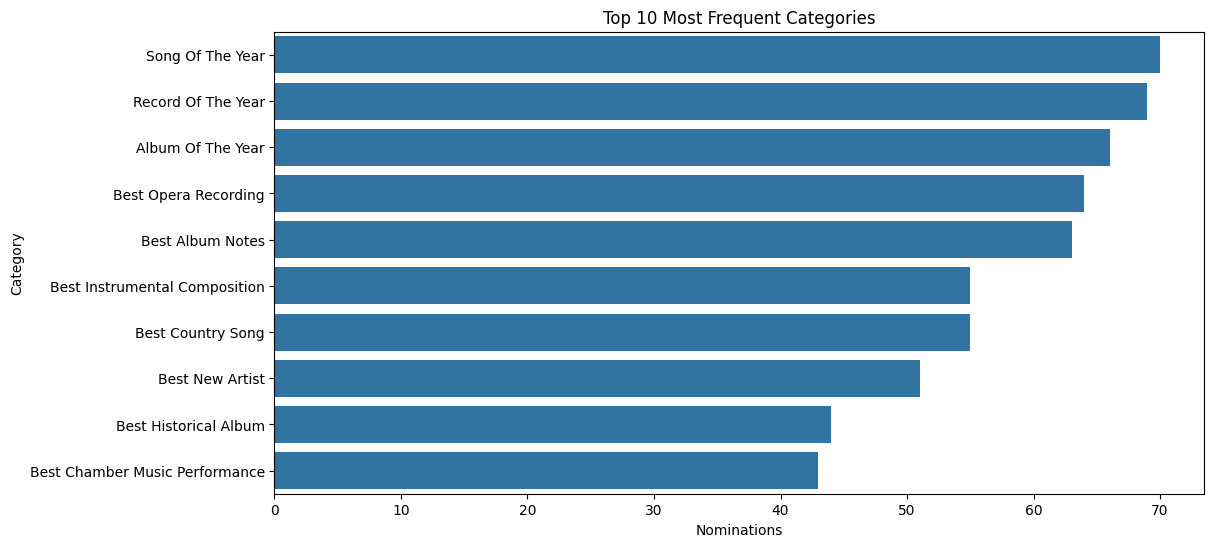

In [30]:

plt.figure(figsize=(12,6))
top_10_categorias = grammy_df['category'].value_counts().head(10)
sns.barplot(x=top_10_categorias.values, y=top_10_categorias.index)
plt.title('Top 10 Most Frequent Categories')
plt.xlabel('Nominations')
plt.ylabel('Category')
plt.show()

##### **_Most Nominated Artists_**

The graph below shows the list of the ten artists with the highest number of nominations in the awards analyzed, using a representation of horizontal bars that facilitates the visual comparison between them.
- The absolute leader in nominations is the Various Artists category, which generally groups collaborations or compilations of multiple performers. It has a very wide gap from the rest.
- Chicago Symphony Orchestra occupies the second position, highlighting the relevance of classical orchestral music in this type of awards.
- John Williams, famous composer of movie soundtracks (Star Wars, Harry Potter, Indiana Jones), appears in third place, reflecting his continued impact on the industry.

C:\Users\natym\AppData\Local\Temp\ipykernel_16824\2305084802.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')


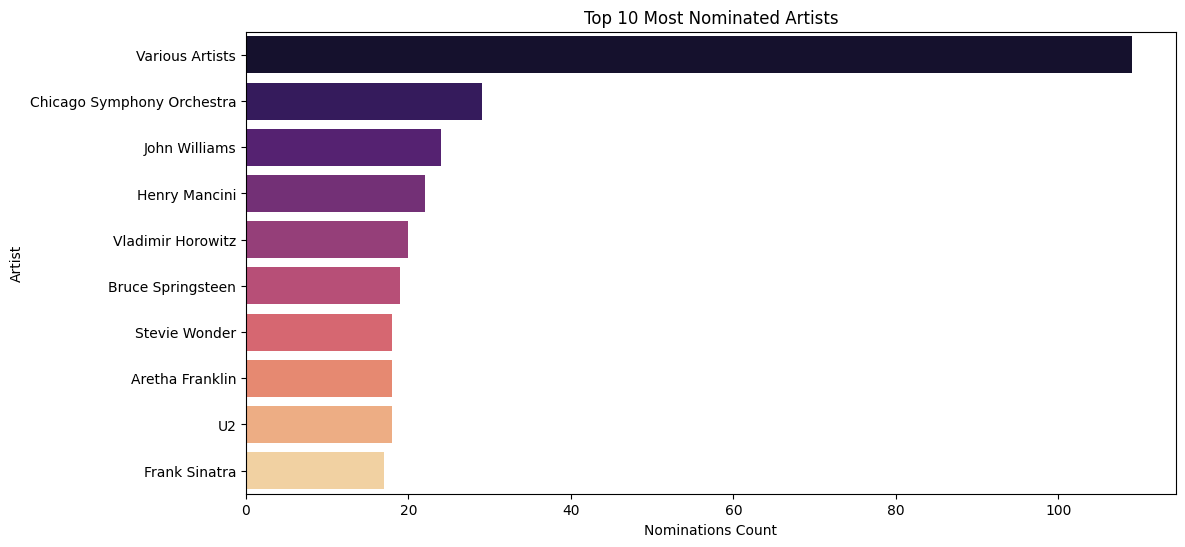

In [ ]:
top_artists = grammy_df['artist'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_artists.values, y=top_artists.index, palette='magma')
plt.title('Top 10 Most Nominated Artists')
plt.xlabel('Nominations Count')
plt.ylabel('Artist')
plt.show()

##### **_Nominations per Decade_**

The graph shows the evolution of the number of nominations over the decades, from 1950 to the 2010s.
- There is a clear and consistent upward trend in the number of nominations per decade. From 1950, where nominations were barely close to 100, to the 2010s, which exceeded 1200 nominations.
- The growth is not linear, but shows an acceleration starting in the 1980s. From this point on, each decade experiences a more pronounced increase than the previous one.

C:\Users\natym\AppData\Local\Temp\ipykernel_16824\1179093928.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=grammy_df, x='decade', palette='viridis')


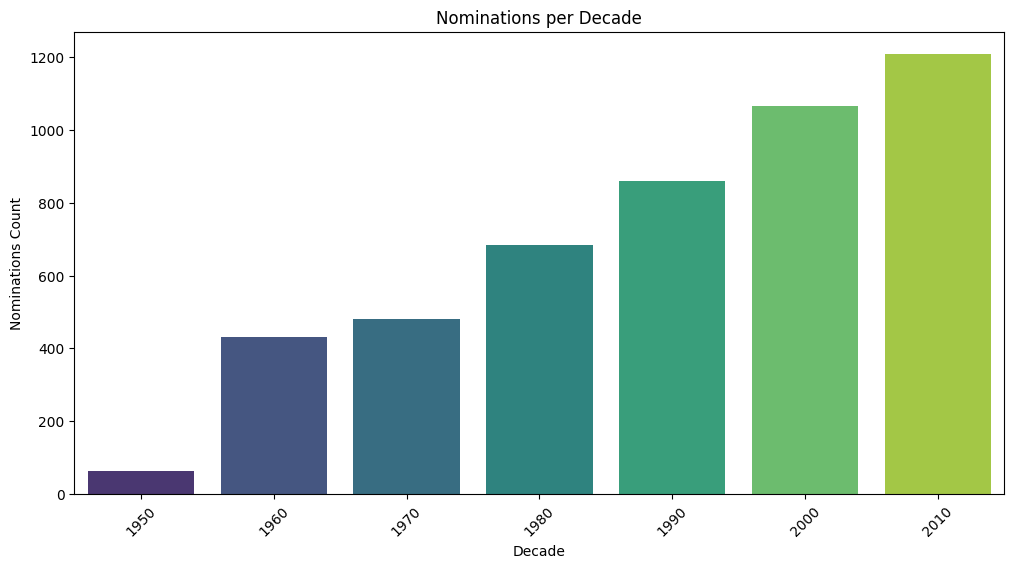

In [ ]:
grammy_df['year'] = pd.to_numeric(grammy_df['year'])
plt.figure(figsize=(12,6))
sns.countplot(data=grammy_df, x='decade', palette='viridis')
plt.xticks(rotation=45)
plt.title('Nominations per Decade')
plt.xlabel('Decade')
plt.ylabel('Nominations Count')
plt.show()